In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/cars.csv")

In [ ]:
data

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [ ]:
# Feature engineering
from datetime import date
data['Car_age'] = date.today().year - data['Year']

In [ ]:
data["Brand"].replace({"ISUZU":"isuzu","Mini":"Mini Cooper","Land":"Land Rover"},inplace=True)

In [ ]:
# Statistical Summary
data.describe(include='all') #for all columns

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
count,100.000000,100,100,100.00000,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.00000
unique,NaN,11,58,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Mustang,NaN,NaN,Petrol,Automatic,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,3,NaN,NaN,52,57,44,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,NaN,2018.39000,28150.000000,NaN,NaN,NaN,17.210000,1855.230000,158.130000,5.230000,1.574000e+06,5.61000
std,29.011492,NaN,NaN,1.17116,9121.375716,NaN,NaN,NaN,3.309902,631.311475,76.968137,0.750151,1.000265e+06,1.17116
min,1.000000,NaN,NaN,2016.00000,10000.000000,NaN,NaN,NaN,10.000000,999.000000,68.000000,4.000000,4.500000e+05,3.00000
25%,25.750000,NaN,NaN,2017.75000,22000.000000,NaN,NaN,NaN,15.000000,1462.000000,103.000000,5.000000,7.000000e+05,5.00000
50%,50.500000,NaN,NaN,2018.00000,27000.000000,NaN,NaN,NaN,17.000000,1774.000000,148.000000,5.000000,1.300000e+06,6.00000
75%,75.250000,NaN,NaN,2019.00000,32000.000000,NaN,NaN,NaN,19.000000,2143.000000,187.000000,5.000000,2.500000e+06,6.25000


In [ ]:
data.describe() #for numerical columns

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_age
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.00000
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06,5.61000
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06,1.17116
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05,3.00000
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05,5.00000
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06,6.00000
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06,6.25000
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06,8.00000


In [ ]:
# seperate numerical and categorical variables
cat_cols=data.select_dtypes(include=['object']).columns

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()

In [ ]:
print("Categorical columns:",cat_cols)

Categorical columns: Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')


In [ ]:
print("Numerical columns:",num_cols)

Numerical columns: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_age']


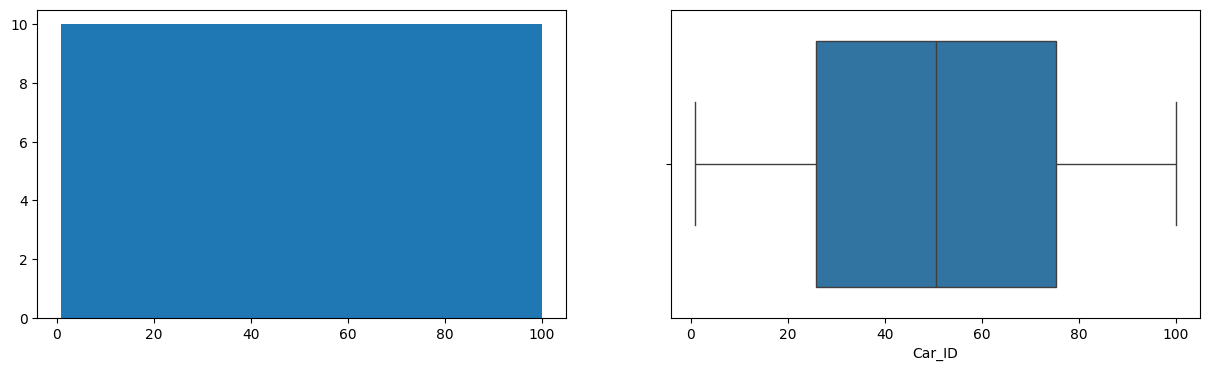

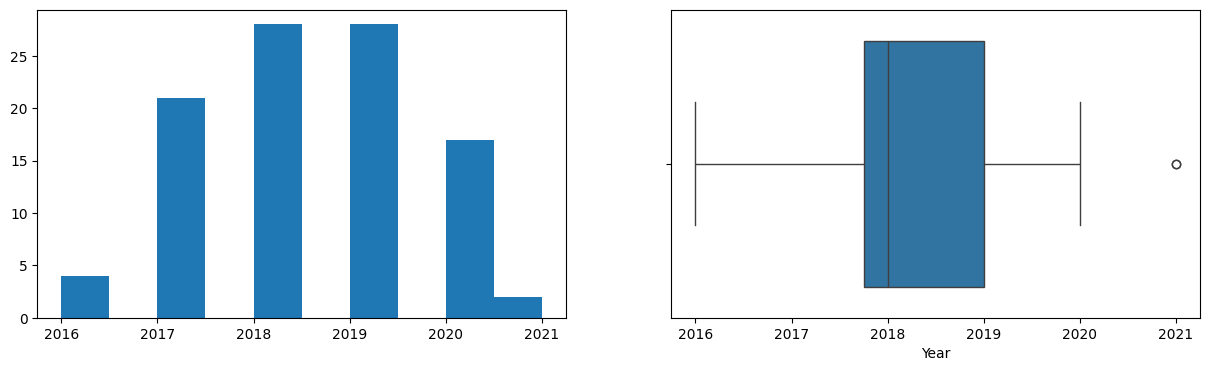

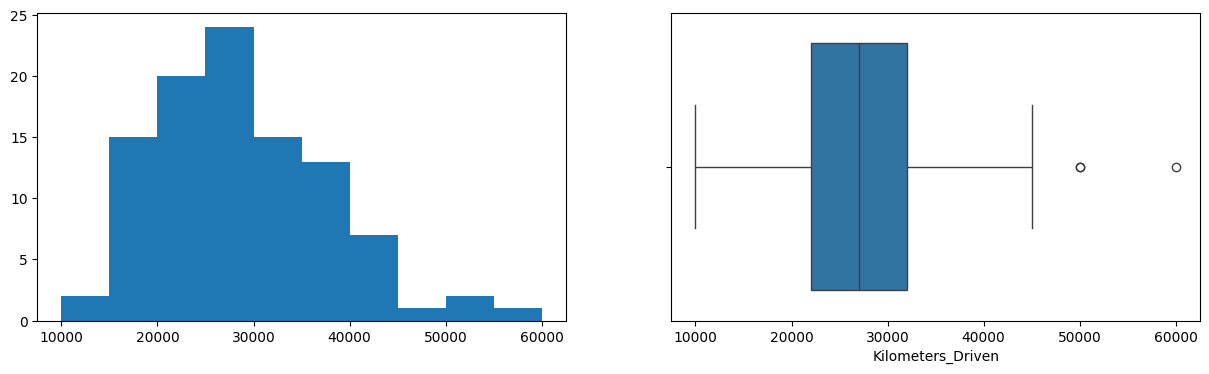

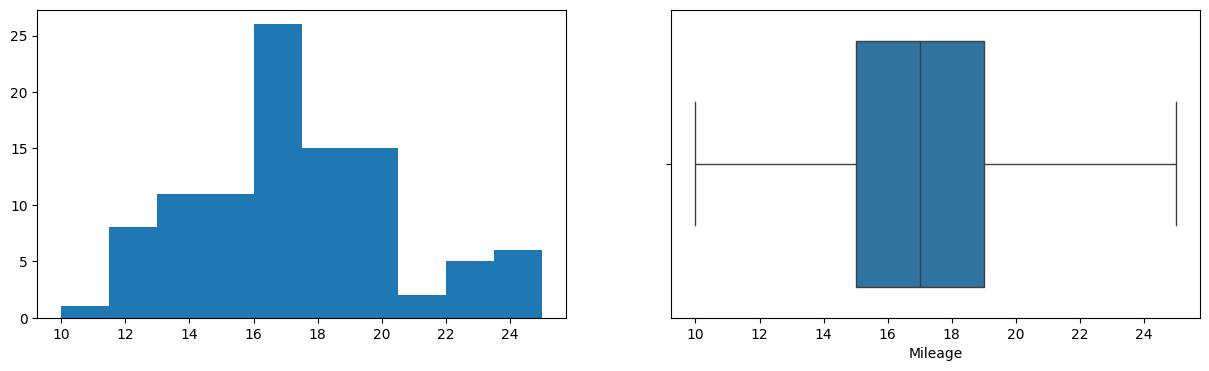

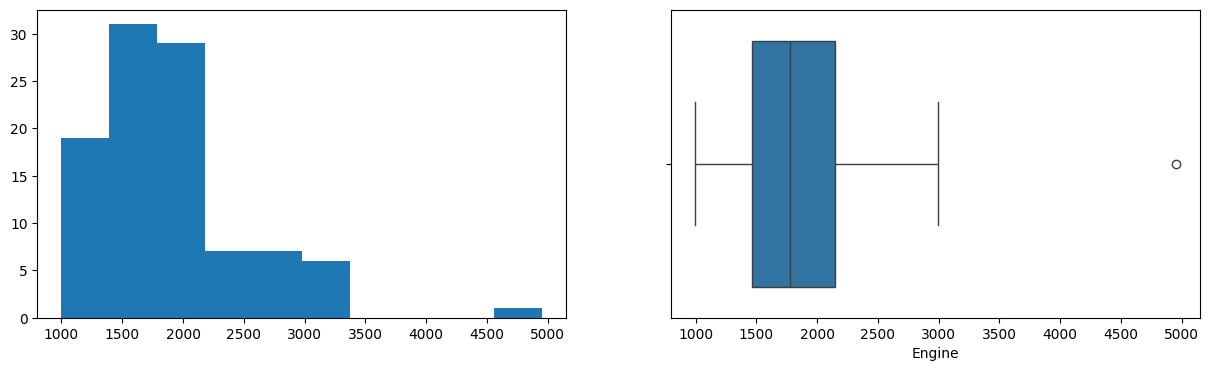

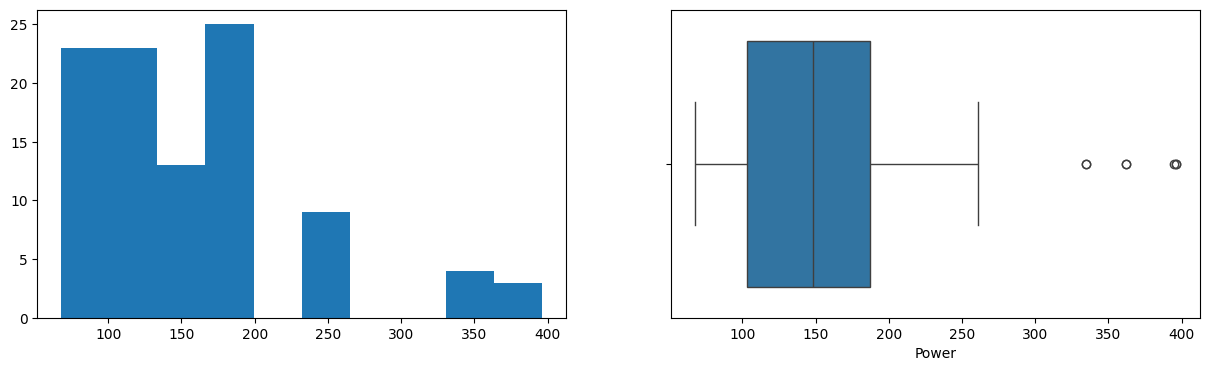

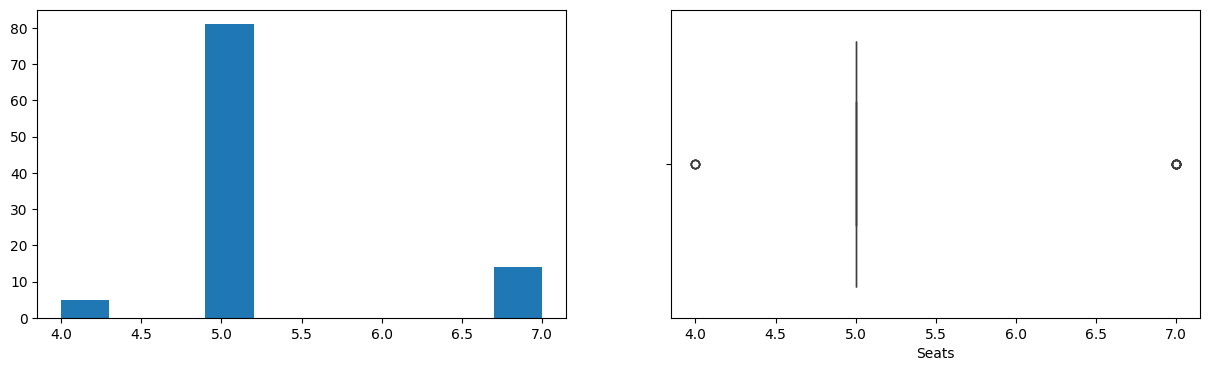

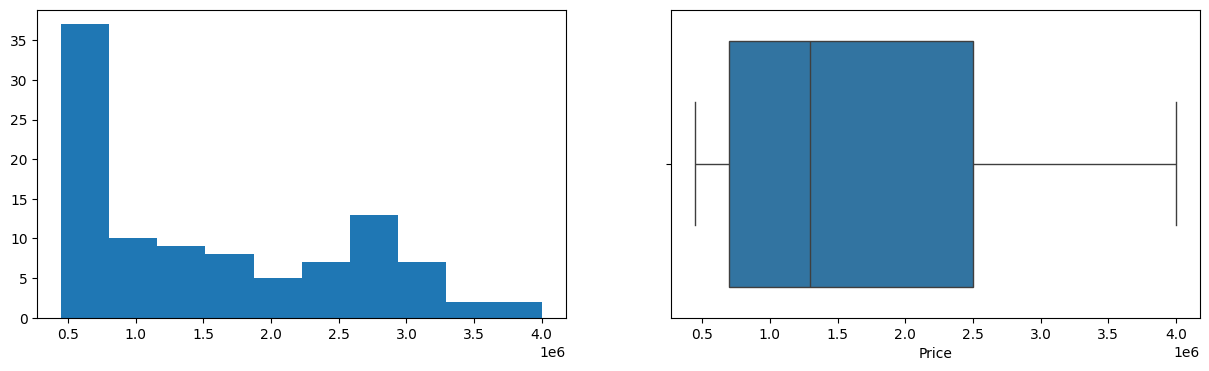

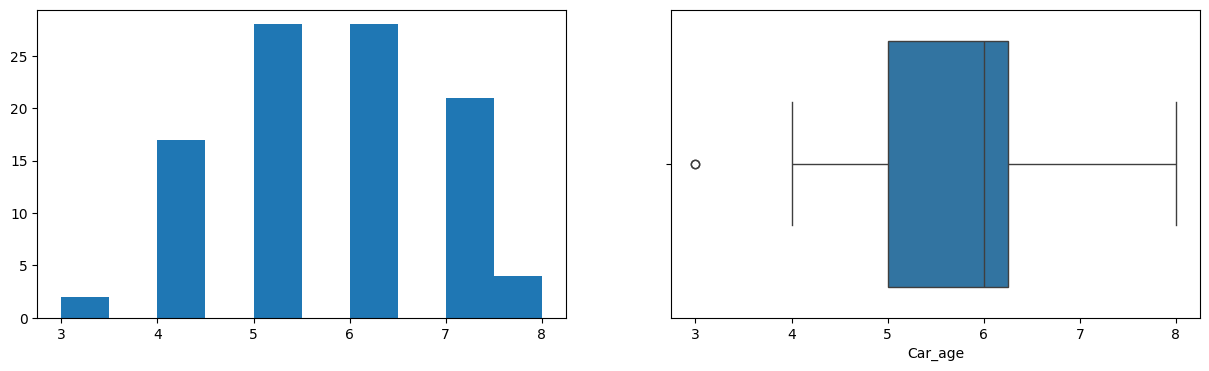

In [ ]:
# Univariate Analysis
for col in num_cols:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

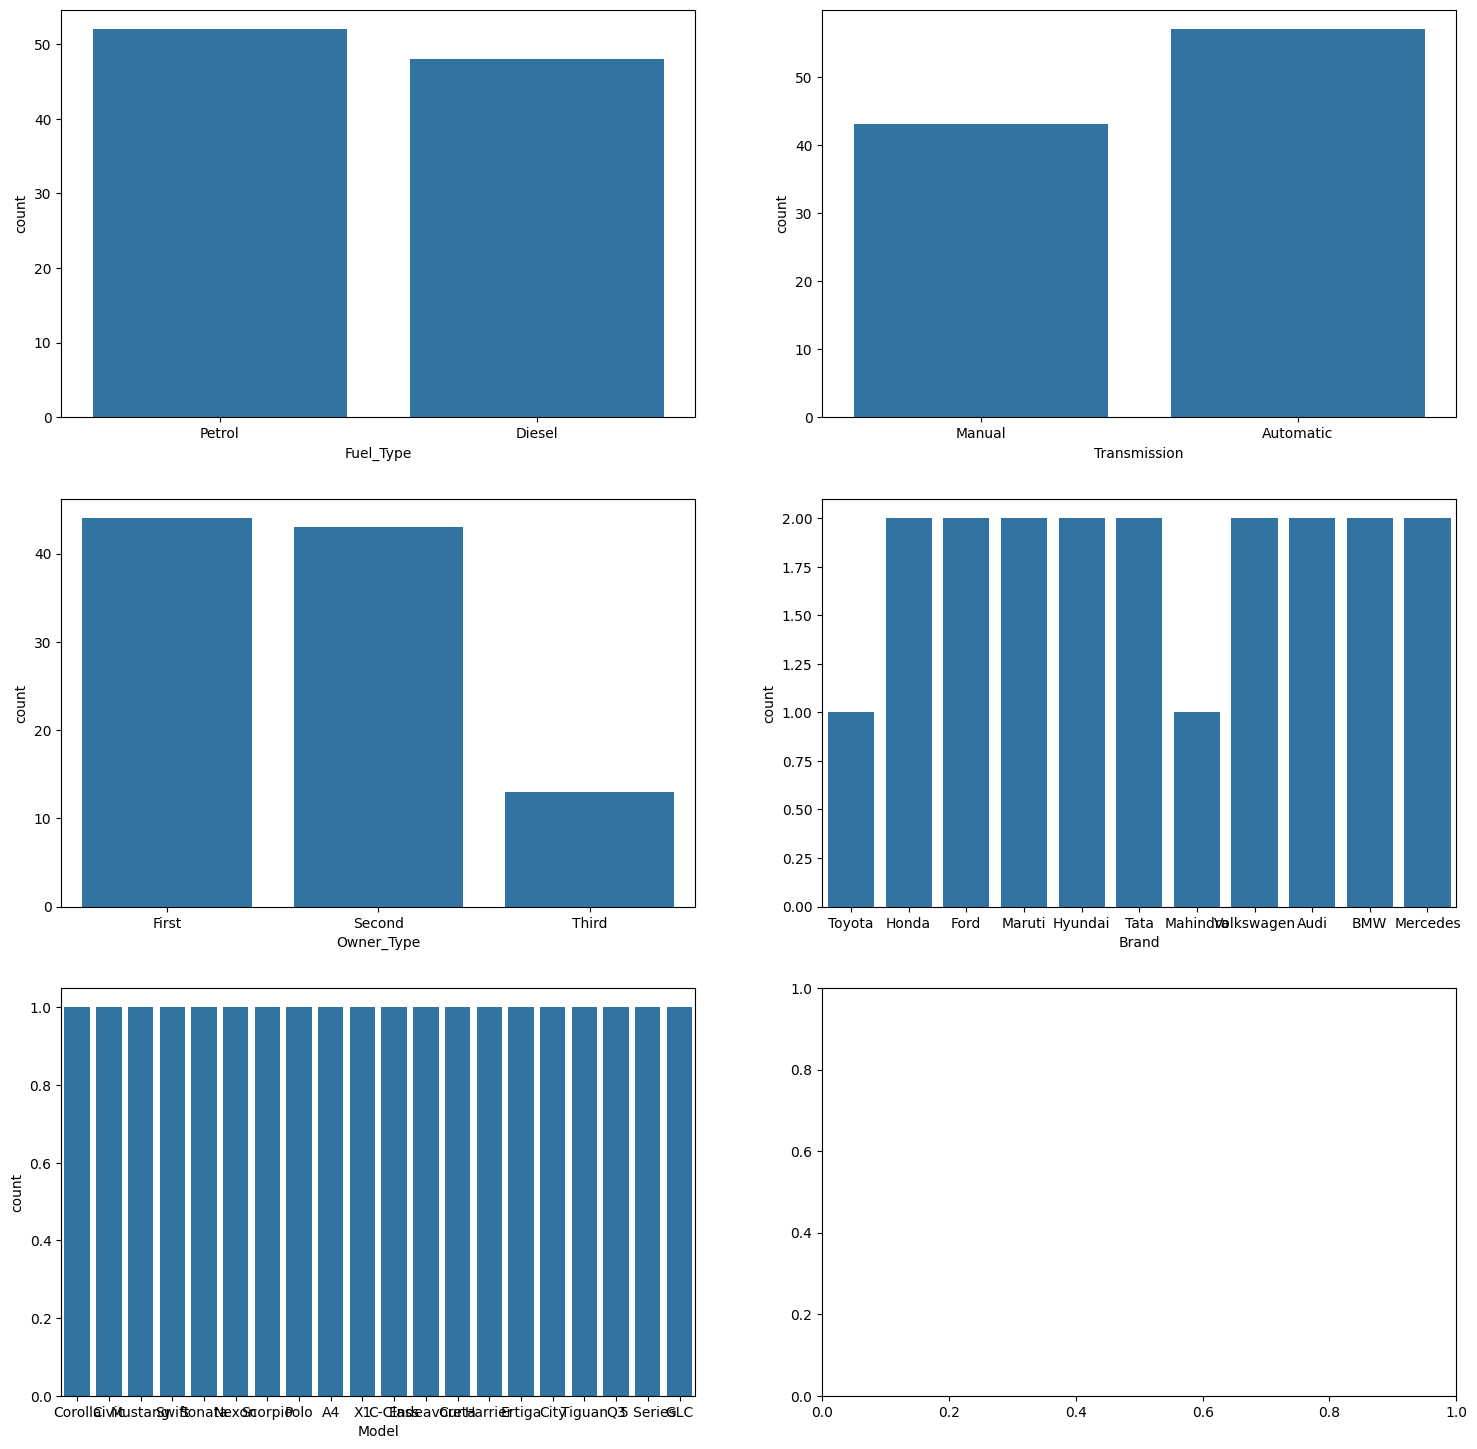

In [ ]:
# Visualize categorical variables using count plots
fig,axes = plt.subplots(3,2,figsize=(18,18))
sns.countplot(ax=axes[0,0],x='Fuel_Type',data=data)
sns.countplot(ax=axes[0,1],x='Transmission',data=data)
sns.countplot(ax=axes[1,0],x='Owner_Type',data=data)
sns.countplot(ax=axes[1,1],x='Brand',data=data.head(20))
sns.countplot(ax=axes[2,0],x='Model',data=data.head(20))
plt.show()

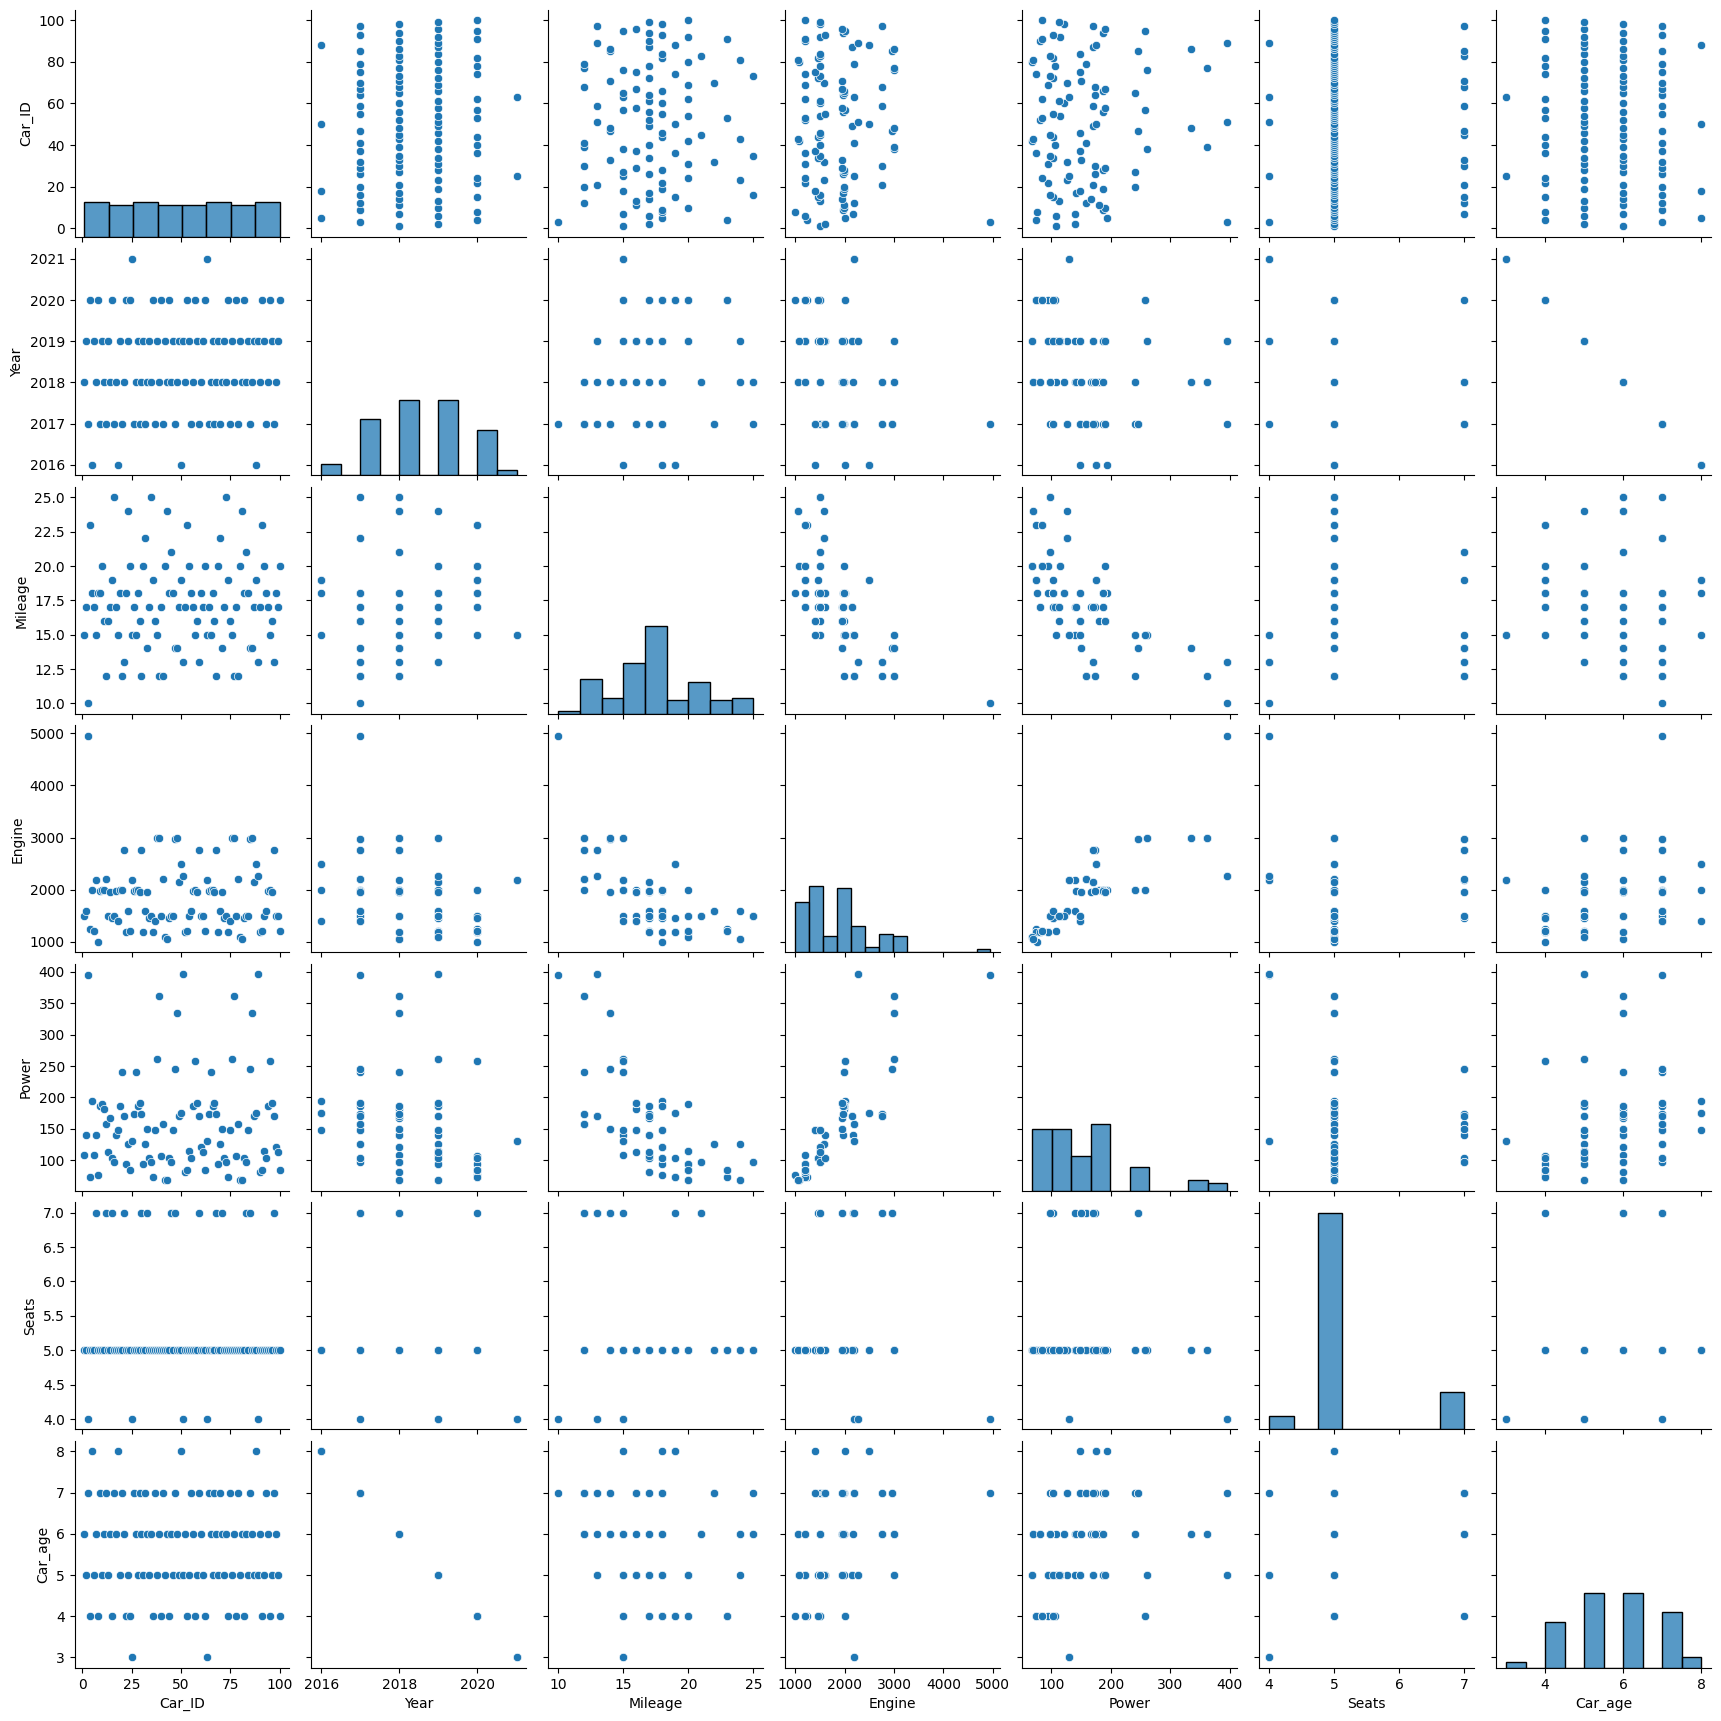

In [ ]:
# Bivariate Analysis
# use pairplot and bar plot to examine relationship between variables
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

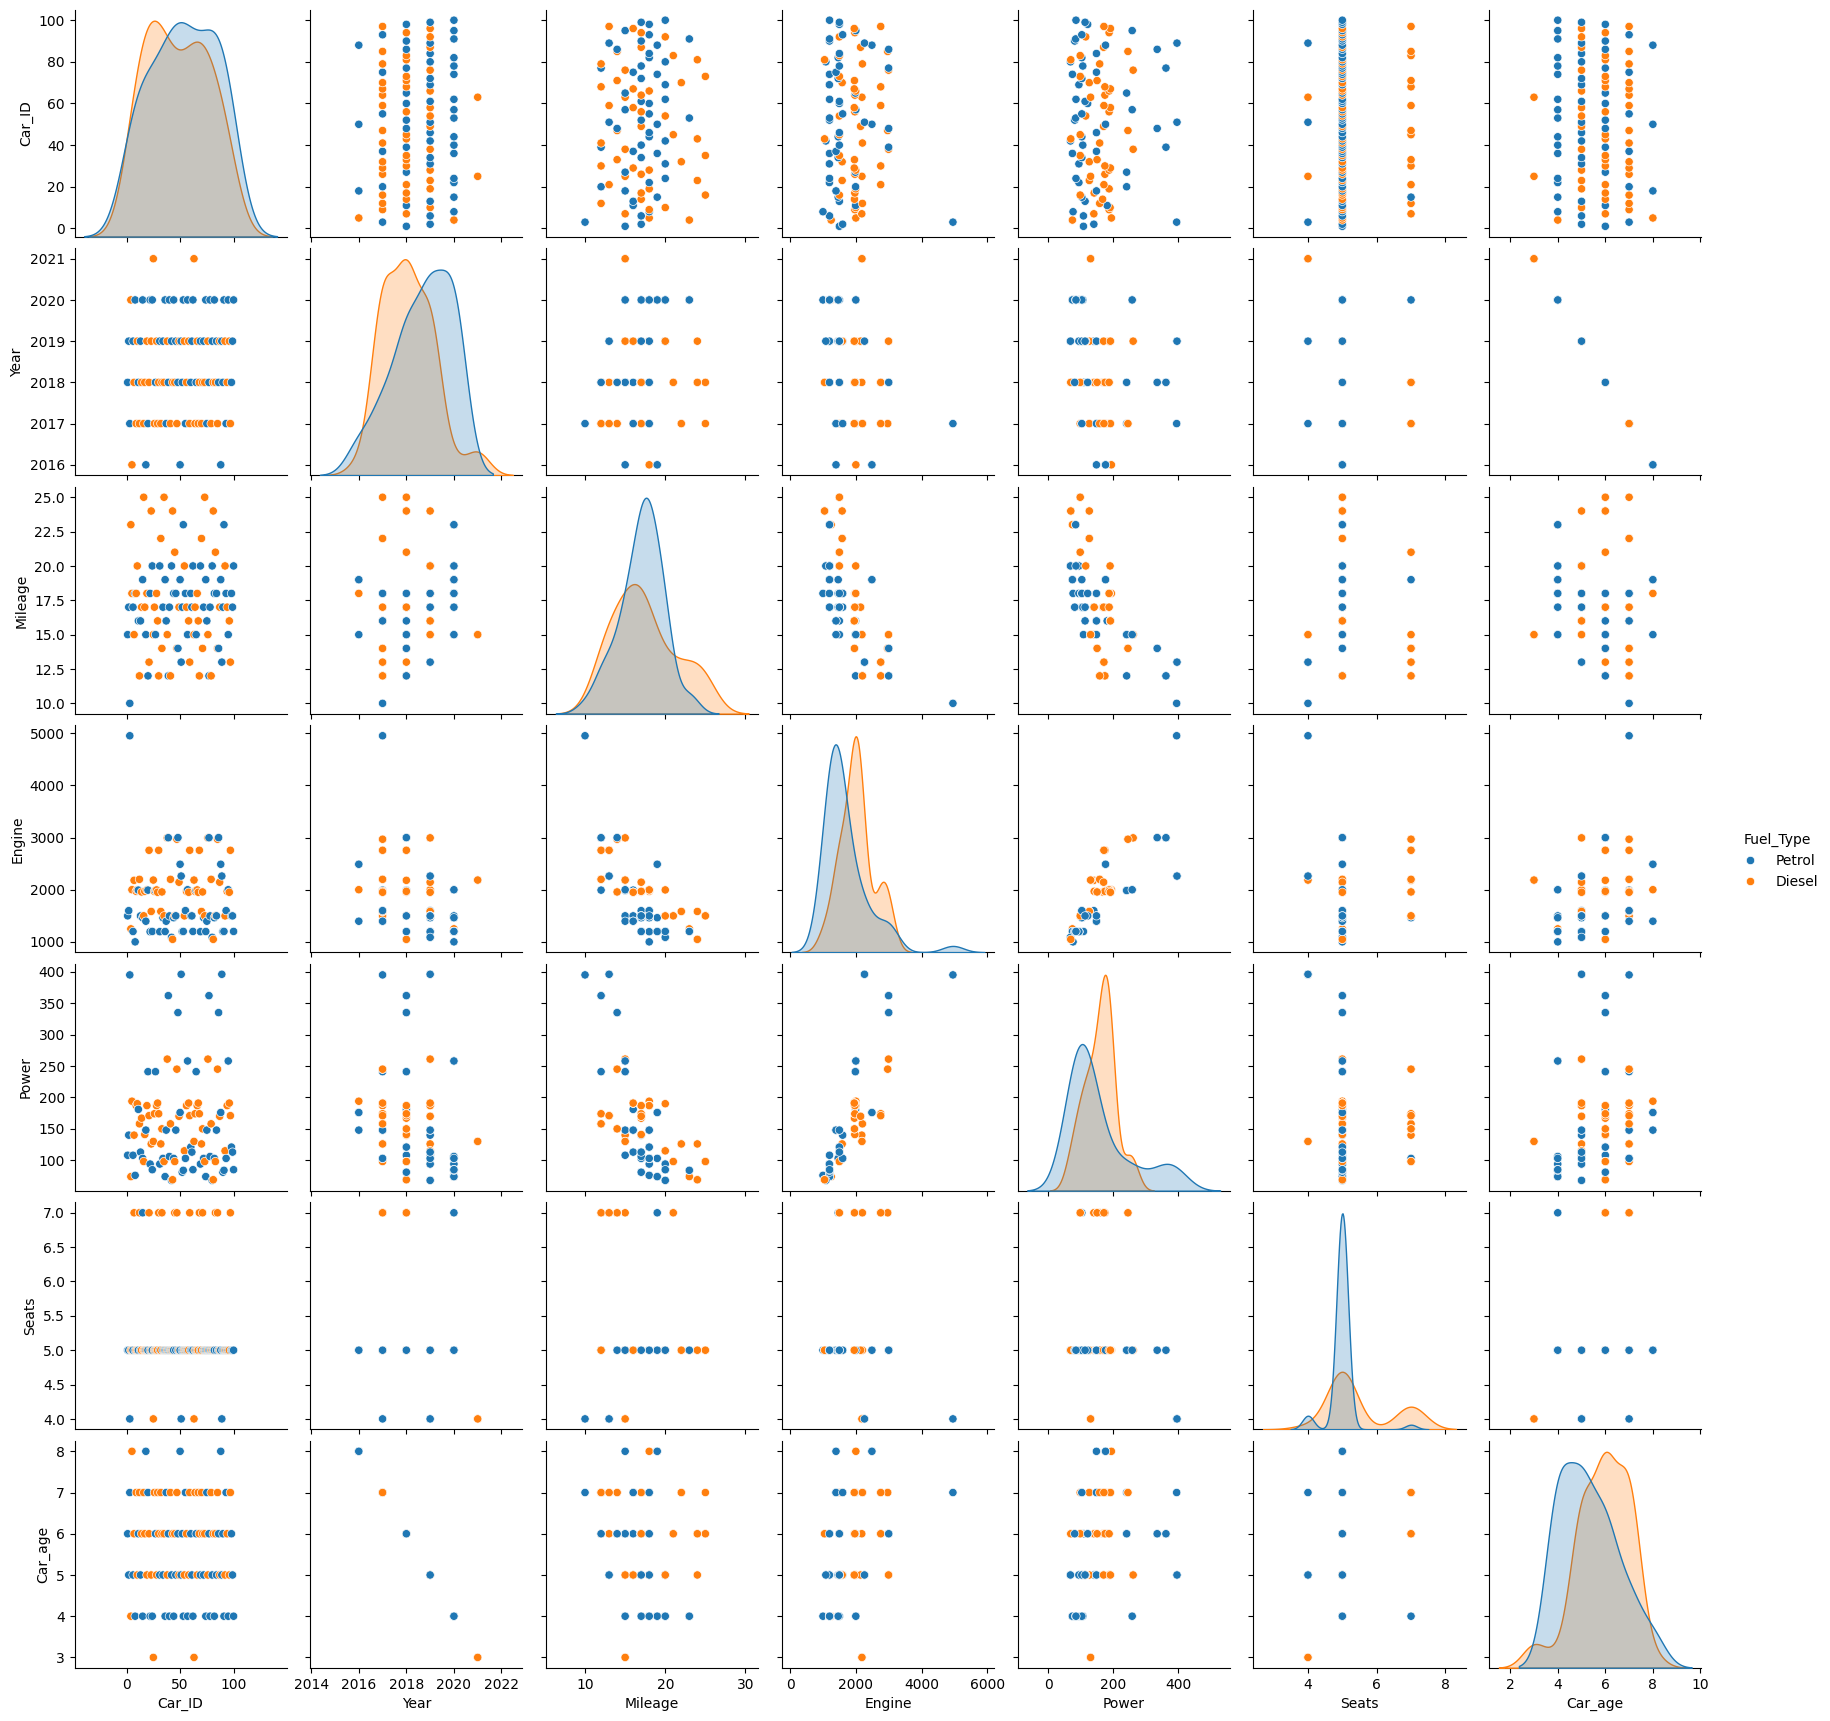

In [ ]:
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1),hue='Fuel_Type')
plt.show()